___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In [530]:
# If you are using Anaconda, you can create a new environment with use of Anaconda terminal and codes below:
# conda create --name soldier
# conda install -c conda-forge ipykernel scikit-learn "numpy<1.25" pandas shap=0.35.0 matplotlib "seaborn==0.12.2" xgboost scikit-plot imbalanced-learn numba jinja2 ipywidgets

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models

#### 4. SMOTE
- Apply Imbalance Learning Techniques

#### 5. SHAP
- Apply Feature selection with SHAP


# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [531]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve, auc
from scikitplot.metrics import plot_roc, precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from scikitplot.metrics import plot_precision_recall
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [532]:
df1 = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="latin-1")
df2 = pd.read_csv("ANSUR II MALE Public.csv", encoding="latin-1")

In [533]:
df1.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [534]:
df2.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [535]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [536]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [537]:
df1.shape

(1986, 108)

In [538]:
df2.shape

(4082, 108)

In [539]:
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()

In [540]:
columns_and_order_are_same = df1.columns.equals(df2.columns)
print(columns_and_order_are_same)

True


In [541]:
df = pd.concat([df1, df2])
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [542]:
df.shape

(6068, 108)

## Explore Data

In [543]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                    int6

In [544]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.000,20757.198,13159.391,10027.000,14841.750,20063.500,27234.500,920103.000
abdominalextensiondepthsitting,6068.000,246.469,37.400,155.000,219.000,242.000,271.000,451.000
acromialheight,6068.000,1406.161,79.091,1115.000,1350.000,1410.000,1462.000,1683.000
acromionradialelength,6068.000,327.374,20.720,249.000,313.000,328.000,341.250,393.000
anklecircumference,6068.000,224.891,16.052,156.000,214.000,225.000,235.000,293.000
axillaheight,6068.000,1299.609,72.022,1038.000,1249.000,1302.000,1349.000,1553.000
balloffootcircumference,6068.000,244.193,16.845,186.000,232.000,245.000,256.000,306.000
balloffootlength,6068.000,194.755,13.516,151.000,185.000,195.000,204.000,245.000
biacromialbreadth,6068.000,399.204,30.237,283.000,376.000,404.000,421.000,489.000
bicepscircumferenceflexed,6068.000,340.934,41.520,216.000,311.000,341.000,370.000,490.000


In [545]:
df.duplicated().sum()

0

In [546]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

# ethnicity

In [547]:
df.ethnicity.value_counts()

ethnicity
Mexican                                               357
Puerto Rican                                          183
Caribbean Islander                                    124
Filipino                                               67
Cherokee                                               65
Korean                                                 53
Dominican                                              32
Chinese                                                26
Japanese                                               22
Vietnamese                                             21
Colombian                                              17
Cuban                                                  17
Arab or Middle Eastern                                 17
Salvadoran                                             16
East/Asian Indian                                      13
Samoan                                                 11
Mexican Puerto Rican                                   10
Peru

In [548]:
df.ethnicity.isnull().sum()

4647

In [549]:
df.drop("ethnicity", axis=1, inplace=True)

# heightin and weightlbs

In [550]:
df.heightin.value_counts() # Height in Inches; self-reported, comparable to measured “stature”

heightin
69    628
70    573
71    557
66    554
68    532
67    519
72    478
64    386
65    324
73    291
63    274
74    236
62    229
75    117
61    102
60     83
76     68
77     36
59     35
78     15
80      7
57      6
58      5
79      5
56      3
81      2
87      1
86      1
94      1
Name: count, dtype: int64

In [551]:
df.stature.value_counts()

stature
1740    47
1730    40
1745    40
1674    39
1790    37
1735    37
1718    36
1774    35
1688    33
1744    33
1717    32
1750    32
1707    32
1763    31
1760    31
1700    31
1710    31
1781    30
1687    30
1715    30
1780    30
1788    29
1673    29
1725    29
1738    29
1722    29
1657    29
1720    29
1728    29
1743    29
1748    29
1737    28
1670    28
1733    28
1800    28
1761    28
1749    28
1721    28
1751    28
1736    27
1805    27
1653    27
1773    27
1664    27
1765    27
1777    27
1772    26
1703    26
1771    26
1798    26
1708    26
1803    26
1768    26
1784    26
1690    25
1775    25
1705    25
1678    25
1814    25
1727    25
1697    25
1713    25
1770    25
1734    24
1723    24
1623    24
1681    24
1764    24
1685    24
1767    24
1754    24
1702    24
1675    23
1680    23
1672    23
1766    23
1785    23
1706    23
1726    23
1807    23
1758    23
1698    23
1757    23
1704    23
1682    23
1724    23
1684    23
1683    23
1709    23
1679    23
16

In [552]:
df.weightlbs.value_counts() # Weight in Pounds; self-reported, comparable to measured “weightkg”

weightlbs
170    234
150    233
180    232
160    215
175    211
185    204
165    202
190    191
200    180
155    162
140    155
210    151
195    147
145    147
135    125
220    114
215    111
130    107
205     98
225     77
230     73
148     59
125     59
168     58
178     57
120     53
158     50
240     49
187     46
138     46
235     43
198     42
153     42
128     39
162     39
127     37
167     36
173     36
147     36
174     36
143     35
172     35
137     34
250     34
169     33
156     33
182     33
152     33
183     32
157     31
142     31
188     31
184     31
154     31
132     29
194     29
193     29
163     29
197     28
177     28
196     28
115     26
181     26
192     26
110     25
176     25
245     23
164     23
212     23
133     22
218     22
186     22
203     22
161     22
124     21
136     21
189     21
171     20
166     20
204     20
118     20
207     19
179     19
206     19
208     19
139     19
141     19
149     18
126     18
260     18


In [553]:
df.weightkg.value_counts()

weightkg
791     25
775     24
727     23
695     23
842     23
882     23
804     22
765     22
760     22
717     21
773     21
809     21
744     21
766     21
797     21
771     20
846     20
735     20
758     20
753     20
690     19
654     19
697     19
801     19
669     19
663     19
750     19
869     18
591     18
781     18
689     18
725     18
822     18
867     18
829     18
730     18
686     18
779     18
821     18
761     18
866     18
784     18
887     17
699     17
793     17
700     17
682     17
676     17
746     17
646     17
858     17
852     17
902     17
661     17
736     17
680     17
708     17
840     17
894     17
802     17
862     17
601     16
734     16
644     16
677     16
675     16
785     16
762     16
786     16
792     16
701     16
847     16
662     16
702     16
705     16
657     16
740     16
650     16
857     16
696     16
819     16
870     16
749     16
742     16
678     16
737     16
712     16
667     16
828     16
778     16
8

In [554]:
# dropped heightin column because heightin and stature columns express the same value and heightin column is self-reported
# dropped weightlbs column because weightlbs and weightkg columns express the same value and weightlbs column is self-reported

In [555]:
df.drop(columns=["heightin", "weightlbs"],inplace=True)

# date, installation, component, branch, primarymos

In [556]:
df.date.value_counts()

date
27-Feb-12    45
5-Apr-12     44
21-Feb-12    43
28-Feb-12    43
5-Mar-12     43
2-Jun-11     41
6-Mar-12     41
26-May-11    40
26-Mar-12    40
3-Apr-12     40
27-Apr-11    39
13-Mar-12    39
29-Feb-12    39
30-Mar-11    39
23-Feb-12    39
15-Mar-11    39
8-Dec-10     38
1-Mar-12     38
20-Mar-12    37
28-May-11    37
7-Mar-12     36
21-Mar-11    36
24-Jan-12    36
11-Apr-11    36
2-Mar-12     36
21-Mar-12    36
25-Jan-12    35
18-Mar-11    35
24-Feb-12    34
16-Mar-12    34
15-Aug-11    33
8-Jun-11     33
30-Jan-11    33
27-May-11    33
25-Mar-12    33
28-Jan-12    33
25-Mar-11    33
8-Mar-12     32
19-Mar-12    32
7-Jun-11     32
26-Mar-11    32
16-Aug-11    32
20-Jan-11    31
17-Mar-11    31
31-Mar-11    31
7-Nov-11     31
8-Dec-11     31
19-Jan-12    31
12-Dec-11    31
27-Jan-12    31
7-Dec-11     30
24-Mar-12    30
2-Feb-12     30
31-Jan-12    30
23-Nov-10    30
5-Oct-11     30
3-Jun-11     30
7-Jul-11     30
5-Dec-11     29
14-Dec-11    29
6-Dec-11     29
9-Mar-12     29
17-

In [557]:
df.installation.value_counts()

installation
Camp Shelby       1160
Fort Bliss         963
Fort Gordon        669
Fort McCoy         452
Camp Atterbury     441
Fort Hood          439
Fort Huachuca      436
Fort Bragg         397
Fort Drum          391
Fort Lee           380
Fort Stewart       339
Fort Rucker          1
Name: count, dtype: int64

In [558]:
df.component.value_counts()

component
Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: count, dtype: int64

In [559]:
df.branch.value_counts()

branch
Combat Service Support    3174
Combat Arms               1582
Combat Support            1312
Name: count, dtype: int64

In [560]:
df.primarymos.value_counts()

primarymos
11B     671
88M     320
92A     288
91B     230
68W     222
92Y     211
42A     201
25U     196
31B     191
25B     176
12B     160
13B     139
35D     131
35M     128
74D     126
92G     123
19D     123
92F     119
25Q     113
35F      82
91D      73
25S      66
25L      62
11C      55
25A      53
19K      50
25N      49
13D      39
12N      39
13F      38
11A      38
91C      38
35G      36
92W      34
94F      33
90A      31
91A      30
91J      30
94E      29
89B      28
36B      27
91H      25
92S      24
21B      24
91L      23
35T      21
68A      20
88N      19
11Z      19
27D      19
25W      18
92M      18
68E      18
56M      17
12C      17
12W      17
15T      16
91X      15
68J      15
25P      15
70B      15
35N      15
13A      15
68K      14
13R      14
66H      14
14J      14
31E      14
35P      14
88A      13
35L      13
88Z      13
15W      13
91E      12
35X      12
25C      12
15P      12
31A      11
351L     11
13Z      11
14T      10
14E      10
12Y  

In [561]:
# date, installation, component, branch, primarymos columns were dropped because the model cannot learn from these columns 

In [562]:
df.drop(columns=["primarymos","component","branch","installation","date"],inplace=True)

# subjectid and subjectnumericrace

In [563]:
df.subjectid 

0       10037
1       10038
2       10042
3       10043
4       10051
        ...  
4077    29442
4078    29443
4079    29447
4080    29451
4081    29452
Name: subjectid, Length: 6068, dtype: int64

In [564]:
df.subjectnumericrace.value_counts() 

# Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other

subjectnumericrace
1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
62          8
35          8
64          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
641         2
431         2
423         2
2518        2
451         2
2351        2
318         2
425         1
238         1
358         1
48          1
42351       1
428         1
631         1
4251        1
Name: count, dtype: int64

In [565]:
df.dodrace.value_counts()

# Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other

dodrace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [566]:
# dropped subjectnumericrace column because subjectnumericrace and dodrace columns express the same value and 
# subjectnumericrace column has unknown values 
# dropped subjectid column because the model cannot learn from these column

In [567]:
df.drop(columns=["subjectid","subjectnumericrace"],inplace=True)

# subjectbirthlocation

In [568]:
subjectsbirthlocation_count = df.subjectsbirthlocation.value_counts()
subjectsbirthlocation_count

subjectsbirthlocation
California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Missouri                     84
Arizona                      84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas            

In [569]:
# Drop subjectbirthlocation with less than 10 counts

In [570]:
drop_birthlocation = subjectsbirthlocation_count[subjectsbirthlocation_count <= 10].index
drop_birthlocation

Index(['Guam', 'Panama', 'Guyana', 'Canada', 'Alaska', 'China', 'American Samoa', 'Peru', 'Russia', 'US Virgin Islands', 'Wyoming', 'Trinidad and Tobago', 'Ukraine', 'Liberia', 'India', 'Barbados', 'El Salvador', 'Ecuador', 'Poland', 'Nicaragua', 'Cuba', 'Grenada', 'Portugal', 'Honduras', 'Nigeria', 'Thailand', 'South Africa', 'Laos', 'Romania', 'Nepal', 'Israel', 'France', 'Morocco', 'Belgium', 'Kenya', 'Iraq', 'Taiwan', 'Netherlands', 'Micronesia', 'Belize', 'Sierra Leone', 'Sudan', 'Lebanon', 'Costa Rica', 'Antigua and Barbuda', 'Turkey', 'United States', 'Bolivia', 'Ghana', 'Cameroon', 'Italy', 'Burma', 'Iceland', 'Palau', 'Ivory Coast', 'Brazil', 'Cape Verde', 'Syria', 'South America', 'New Zealand', 'Singapore', 'Argentina', 'French Guiana', 'Belarus', 'Ethiopia', 'Saint Lucia', 'Egypt', 'Togo', 'Cambodia', 'Senegal', 'Bangladesh', 'Guadalupe', 'Dominica', 'Azerbaijan', 'Korea', 'Venezuela', 'Fiji', 'Northern Mariana Islands', 'Iran', 'Bosnia and Herzegovina', 'Bermuda',
       '

In [571]:
for i in drop_birthlocation:
    drop_index = df[df['subjectsbirthlocation'] == i].index
    df.drop(index = drop_index, inplace=True)
    
df.reset_index(drop=True, inplace=True)
    
# We pull all the birthlocations in the birthlocation list in order and find the indexes of the observations of these models first.
# We drop the indexes we find from our data every time.
# Since the deleted indexes in the last stage will not appear in our data, we reset the indexes starting from 0.

In [572]:
df.subjectsbirthlocation.value_counts()

subjectsbirthlocation
California              426
New York                410
Texas                   384
Indiana                 259
Oklahoma                219
Illinois                209
Florida                 199
Minnesota               197
Michigan                189
Mississippi             188
Georgia                 165
Alabama                 160
South Carolina          157
North Carolina          146
Louisiana               134
Ohio                    134
Pennsylvania            127
Virginia                115
Massachusetts           108
Wisconsin               100
Germany                  89
Puerto Rico              87
New Jersey               84
Missouri                 81
Colorado                 79
Arizona                  79
Maryland                 76
Tennessee                72
Kentucky                 67
Washington               66
Kansas                   62
South Dakota             55
Iowa                     54
Arkansas                 54
Philippines              4

# age

In [573]:
df.age.value_counts()

age
21    362
22    347
23    330
24    309
20    305
25    290
26    289
28    257
27    255
19    239
29    212
31    212
30    199
32    144
33    140
41    136
42    131
40    130
38    117
37    116
39    115
35    109
34    108
18    107
36    103
44     84
43     78
45     68
47     53
46     52
48     47
50     38
49     37
51     29
53     21
52     16
54     12
56     10
55      9
58      5
57      4
17      2
Name: count, dtype: int64

# gender

In [574]:
df.gender.value_counts()

gender
Male      3820
Female    1807
Name: count, dtype: int64

# writingpreference

In [575]:
df.writingpreference.value_counts()

writingpreference
Right hand                     4945
Left hand                       627
Either hand (No preference)      55
Name: count, dtype: int64

# dodrace

In [576]:
# this is the target column

In [577]:
# Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other

In [578]:
df.dodrace.value_counts()

dodrace
1    3593
2    1187
3     611
4     148
5      47
6      39
8       2
Name: count, dtype: int64

In [579]:
# Dropped dodrace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [580]:
df = df[(df.dodrace==1) | (df.dodrace==2) | (df.dodrace==3)]
df.dodrace.value_counts()

dodrace
1    3593
2    1187
3     611
Name: count, dtype: int64

In [581]:
race_mapping = {
    1: 'White',
    2: 'Black',
    3: 'Hispanic'
}

df['dodrace'] = df['dodrace'].map(race_mapping)

In [582]:
df.dodrace.value_counts()  # inbalanced data, scaling is necessary

dodrace
White       3593
Black       1187
Hispanic     611
Name: count, dtype: int64

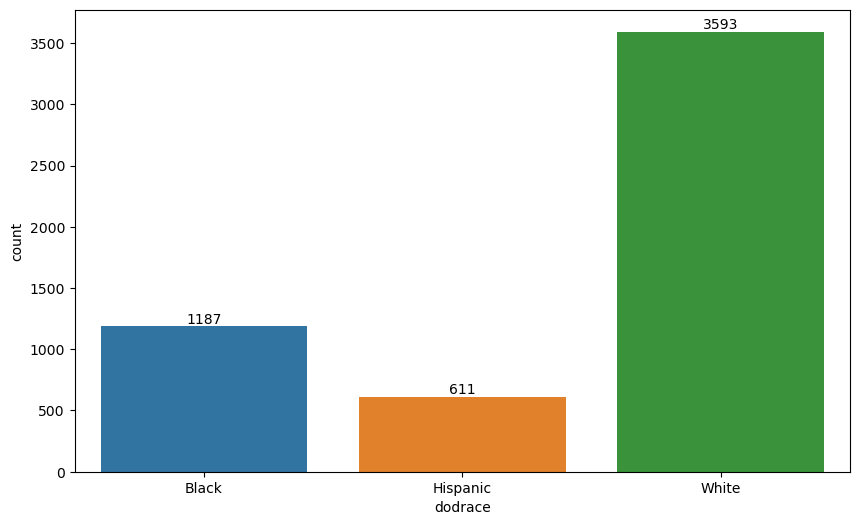

In [583]:
ax=sns.countplot(data=df, x="dodrace")   
ax.bar_label(ax.containers[0]);  
plt.show()

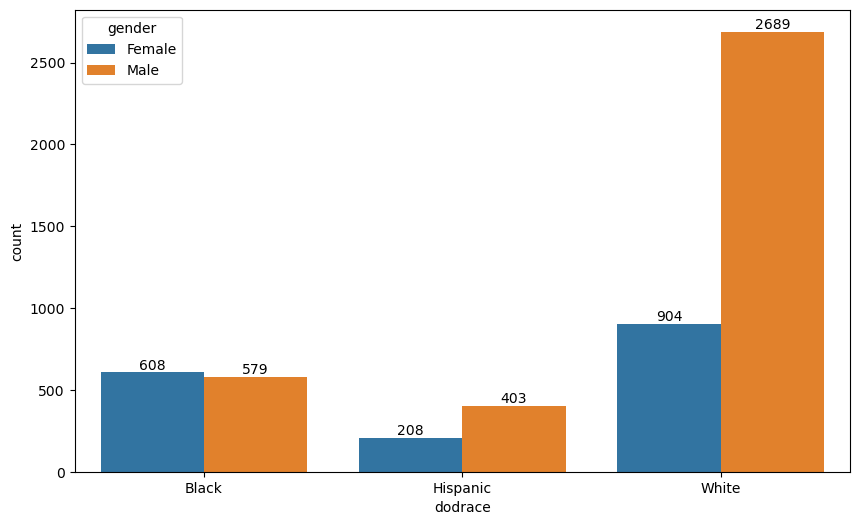

In [584]:
ax = sns.countplot(x="dodrace", hue="gender", data = df)
for p in ax.containers:
    ax.bar_label(p)

# distrubutions among gender

In [585]:
df.reset_index(drop=True, inplace=True)

In [586]:
df.shape

(5391, 98)

In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5391 non-null   int64 
 1   acromialheight                  5391 non-null   int64 
 2   acromionradialelength           5391 non-null   int64 
 3   anklecircumference              5391 non-null   int64 
 4   axillaheight                    5391 non-null   int64 
 5   balloffootcircumference         5391 non-null   int64 
 6   balloffootlength                5391 non-null   int64 
 7   biacromialbreadth               5391 non-null   int64 
 8   bicepscircumferenceflexed       5391 non-null   int64 
 9   bicristalbreadth                5391 non-null   int64 
 10  bideltoidbreadth                5391 non-null   int64 
 11  bimalleolarbreadth              5391 non-null   int64 
 12  bitragionchinarc                5391 non-null   

In [588]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5391.000,247.430,37.575,155.000,220.000,243.000,272.000,451.000
acromialheight,5391.000,1409.460,77.900,1146.000,1354.000,1413.000,1464.000,1683.000
acromionradialelength,5391.000,328.291,20.329,249.000,314.000,329.000,342.000,393.000
anklecircumference,5391.000,225.373,15.900,170.000,215.000,225.000,236.000,293.000
axillaheight,5391.000,1302.535,70.871,1062.000,1253.000,1305.000,1351.000,1553.000
balloffootcircumference,5391.000,244.505,16.747,194.000,233.000,245.000,256.000,306.000
balloffootlength,5391.000,195.242,13.351,151.000,186.000,196.000,205.000,245.000
biacromialbreadth,5391.000,400.042,29.944,311.000,377.000,405.000,422.000,489.000
bicepscircumferenceflexed,5391.000,341.963,41.113,216.000,312.000,342.000,370.000,490.000
bicristalbreadth,5391.000,275.151,19.167,197.000,262.000,275.000,288.000,362.000


In [589]:
df_corr = df.corr(numeric_only=True)
df_corr

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,age
abdominalextensiondepthsitting,1.000,0.344,0.304,0.517,0.272,0.453,0.326,0.410,0.692,0.507,0.723,0.360,0.527,0.624,0.517,0.741,0.841,0.238,0.471,0.318,0.660,0.329,0.628,0.827,0.779,0.288,0.179,0.467,0.195,0.238,0.403,0.140,0.270,0.274,0.437,0.338,0.338,0.627,0.727,0.298,0.407,0.413,0.453,0.296,0.357,0.359,0.322,0.498,0.434,0.599,0.561,0.249,0.258,0.597,0.538,0.266,0.340,0.213,0.342,0.677,0.286,0.653,0.623,0.312,0.306,0.138,0.271,0.635,0.277,0.179,0.269,0.414,0.266,0.309,0.299,0.345,0.286,0.731,0.725,0.383,0.252,0.178,0.222,0.729,0.568,0.860,0.940,0.959,0.579,0.137,0.825,0.544,0.380,0.390
acromialheight,0.344,1.000,0.866,0.505,0.987,0.690,0.796,0.731,0.517,0.401,0.623,0.703,0.565,0.580,0.504,0.277,0.333,0.866,0.808,0.743,0.407,0.984,0.540,0.524,0.277,0.959,0.899,0.336,0.404,0.358,0.444,0.282,0.300,0.816,0.667,0.826,0.845,0.632,0.567,0.862,0.893,0.708,0.717,0.752,0.408,0.430,0.546,0.798,0.446,0.205,0.098,0.932,0.342,0.520,0.587,0.895,0.931,0.855,0.677,0.325,0.539,0.625,0.650,0.867,0.707,0.892,0.821,0.687,0.887,0.537,0.824,0.871,0.879,0.883,0.980,0.985,0.944,0.269,0.437,0.802,0.890,0.326,0.883,0.731,0.728,0.434,0.399,0.356,0.610,0.931,0.673,0.731,0.921,0.084
acromionradialelength,0.304,0.866,1.000,0.414,0.854,0.596,0.723,0.662,0.444,0.344,0.553,0.610,0.511,0.508,0.451,0.241,0.281,0.810,0.770,0.729,0.351,0.863,0.463,0.464,0.263,0.838,0.847,0.240,0.300,0.308,0.374,0.236,0.000,0.640,0.579,0.745,0.814,0.550,0.495,0.833,0.817,0.620,0.629,0.717,0.354,0.383,0.476,0.705,0.434,0.182,0.084,0.856,0.342,0.460,0.532,0.827,0.857,0.809,0.549,0.282,0.472,0.540,0.563,0.789,0.661,0.824,0.796,0.615,0.967,0.508,0.648,0.869,0.939,0.892,0.852,0.859,0.846,0.229,0.372,0.798,0.821,0.290,0.829,0.578,0.608,0.369,0.349,0.321,0.483,0.842,0.589,0.637,0.673,0.084
anklecircumference,0.517,0.505,0.414,1.000,0.461,0.713,0.561,0.536,0.638,0.447,0.643,0.693,0.520,0.532,0.505,0.563,0.574,0.354,0.500,0.329,0.815,0.509,0.560,0.613,0.485,0.484,0.376,0.461,0.376,0.212,0.369,0.238,0.314,0.512,0.655,0.578,0.451,0.663,0.613,0.452,0.515,0.576,0.610,0.453,0.408,0.430,0.434,0.732,0.528,0.460,0.404,0.417,0.245,0.511,0.523,0.413,0.506,0.382,0.488,0.693,0.402,0.575,0.581,0.504,0.448,0.350,0.396,0.631,0.423,0.350,0.522,0.544,0.406,0.465,0.510,0.519,0.442,0.590,0.648,0.456,0.397,0.292,0.368,0.664,0.509,0.584,0.563,0.510,0.484,0.408,0.742,0.698,0.509,-0.028


In [590]:
df_object = df.select_dtypes(include ="object").head()
df_object

# select_dtypes(include ="object") method to filter only object type features 

,gender,subjectsbirthlocation,dodrace,writingpreference
0,Female,Germany,Black,Right hand
1,Female,California,Hispanic,Right hand
2,Female,Texas,White,Right hand
3,Female,District of Columbia,Black,Right hand
4,Female,Texas,White,Right hand


In [591]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

# we see how many unique observations each feature consists of.

gender                        : 2
subjectsbirthlocation         : 60
dodrace                       : 3
writingpreference             : 3


In [592]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())
    
# OneHotEncoder:
# OneHotEncoder converts categorical features into dummies 0 and 1.
# If we want our model to treat all unique values under the categorical feature equally,
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.

# OrdinalEncoder:
# if unique categorical data under a featurea have a hierarchical advantage over
# each other (good, bad, very bad or cheap, average, expensive, very expensive) etc.
# If we want the model to treat all observations according to their superiority,
# that is, not to treat them equally, we use the ordianlencoder conversion algorithm.

# To briefly summarize, if a feature has a meaningful relationship with the target, the ordinal encoder is applied.

gender                        : ['Female' 'Male']
subjectsbirthlocation         : ['Germany' 'California' 'Texas' 'District of Columbia' 'New Mexico'
 'Virginia' 'South Korea' 'Massachusetts' 'Michigan' 'Dominican Republic'
 'Colorado' 'South Dakota' 'Louisiana' 'Ohio' 'South Carolina'
 'Mississippi' 'Illinois' 'West Virginia' 'New York' 'Iowa' 'Florida'
 'Oklahoma' 'Pennsylvania' 'North Carolina' 'Alabama' 'Wisconsin'
 'Arizona' 'Washington' 'Kentucky' 'Tennessee' 'Connecticut' 'Kansas'
 'Georgia' 'Oregon' 'Delaware' 'Indiana' 'Jamaica' 'Puerto Rico' 'Mexico'
 'Maryland' 'Hawaii' 'Montana' 'North Dakota' 'New Jersey' 'Utah' 'Nevada'
 'United Kingdom' 'Missouri' 'Minnesota' 'Idaho' 'Philippines' 'Nebraska'
 'Maine' 'Haiti' 'New Hampshire' 'Colombia' 'Arkansas' 'Japan'
 'Rhode Island' 'Vermont']
dodrace                       : ['Black' 'Hispanic' 'White']
writingpreference             : ['Right hand' 'Left hand' 'Either hand (No preference)']


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

## Varience Inflation Factor

In [593]:
df_numeric=df.select_dtypes(include ="number")
df_numeric

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,age
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,26
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,21
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,23
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,22
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,886,152,762,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5386,235,1353,312,216,1263,228,193,384,318,241,

In [594]:
X_vif = df_numeric
df_vif = pd.DataFrame()
df_vif['features'] = X_vif.columns

In [595]:
df_vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
df_vif

,features,VIF
0,abdominalextensiondepthsitting,740.469
1,acromialheight,58041.032
2,acromionradialelength,7044.525
3,anklecircumference,1095.842
4,axillaheight,28425.504
5,balloffootcircumference,2207.239
6,balloffootlength,3510.646
7,biacromialbreadth,3103.877
8,bicepscircumferenceflexed,820.657
9,bicristalbreadth,699.619


In [596]:
X = df.drop('dodrace',axis=1)
y = df['dodrace']

In [597]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# stratify=y is used since the data is inbalanced

In [598]:
print(y.value_counts(normalize=True))
print()
print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))

# Distributed targets 80% to the train set and 20% to the test set.

dodrace
White      0.666
Black      0.220
Hispanic   0.113
Name: proportion, dtype: float64

dodrace
White      0.667
Black      0.220
Hispanic   0.113
Name: proportion, dtype: float64

dodrace
White      0.666
Black      0.221
Hispanic   0.113
Name: proportion, dtype: float64


In [599]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4312, 97)
Train target shape   :  (4312,)
Test features shape  :  (1079, 97)
Test target shape    :  (1079,)


In [600]:
cat_onehot = ["writingpreference","subjectsbirthlocation"]
cat_ordinal = ["gender"]

cat_for_gender = ["Female","Male"]

In [601]:
enc_onehot = OneHotEncoder(handle_unknown='ignore',sparse_output = False)
enc_ordinal = OrdinalEncoder(categories=[cat_for_gender])
                                                    

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False) 

# MinMaxScaler() should be used because there will be too many columns consisting of 1s and 0s due to encoding 

# What are we looking for?

- Suppose that people of Hispanic race are predisposed to a certain disease, for example diabetes or hypertension. 
- In this project we want to capture and treat people of Hispanic race.
- For this, we will try to improve the precision value.

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [602]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [603]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression(class_weight = 'balanced',
                                              random_state = 42))]

logistic_model = Pipeline(steps=operations) # set_output(transform="pandas")

logistic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['writingpreference',
                                                   'subjectsbirthlocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male']]),
                                                  ['gender'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [604]:
y_pred = logistic_model.predict(X_test)
y_pred

# target can be numeric data or object data.

array(['White', 'White', 'Hispanic', ..., 'Black', 'White', 'White'],
      dtype=object)

In [605]:
y_pred_proba = logistic_model.predict_proba(X_test)
y_pred_proba

array([[0.00717128, 0.0083311 , 0.98449762],
       [0.00140761, 0.07038866, 0.92820373],
       [0.01777712, 0.69495308, 0.28726979],
       ...,
       [0.88927044, 0.00990185, 0.10082771],
       [0.00874583, 0.08740224, 0.90385193],
       [0.10335319, 0.16678979, 0.72985702]])

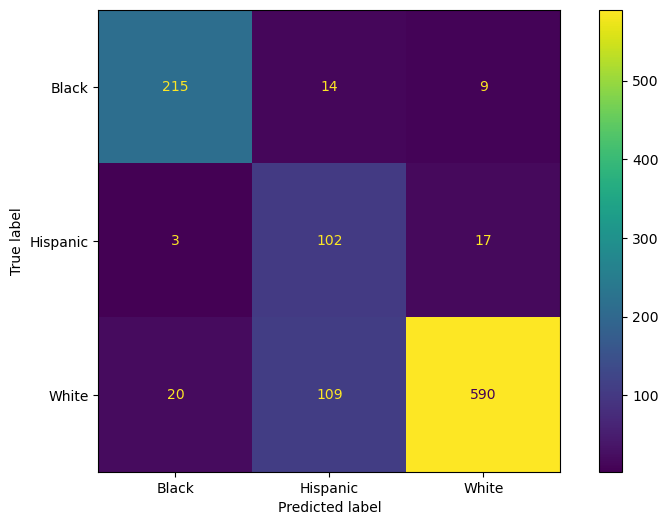

In [606]:
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test);

In [607]:
eval_metric(logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[215  14   9]
 [  3 102  17]
 [ 20 109 590]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       238
    Hispanic       0.45      0.84      0.59       122
       White       0.96      0.82      0.88       719

    accuracy                           0.84      1079
   macro avg       0.77      0.85      0.79      1079
weighted avg       0.89      0.84      0.85      1079


Train_Set
[[ 889   35   25]
 [  19  409   61]
 [  55  336 2483]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       949
    Hispanic       0.52      0.84      0.64       489
       White       0.97      0.86      0.91      2874

    accuracy                           0.88      4312
   macro avg       0.80      0.88      0.83      4312
weighted avg       0.91      0.88      0.89      4312



## Cross Validation

In [608]:
# In multiclass classification problems, if all classes have the same importance
# It will be more accurate to evaluate the results according to macro, weighted or accuracy scores.

# macro avg: treats all classes equally.
# If we want the scores of the class with more observations to come to the fore, weighted avg is used.

# micro_scores are equal to accuracy. It can be used if the data is balanced.

In [609]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_macro','recall_macro',
                                                                   'f1_macro'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.904
train_accuracy          0.915
test_precision_macro    0.877
train_precision_macro   0.894
test_recall_macro       0.798
train_recall_macro      0.815
test_f1_macro           0.828
train_f1_macro          0.845
dtype: float64

## Cross Validation for Hispanic

In [610]:
# We do not use precision, recall and f1 metrics alone for CV or gridsearchCV in multiclass data.
# As it is stated above, precision_weighted, precision_macro, precision_micro etc.
# Otherwise you will get an error. If we want to see the CV scores of a single class specifically,
# we should use the make_scorer function as shown below.

In [611]:
f1_Hispanic = make_scorer(f1_score, pos_label="Hispanic", average = None, labels =["Hispanic"])
precision_Hispanic = make_scorer(precision_score, pos_label="Hispanic", average = None, labels =["Hispanic"])
recall_Hispanic = make_scorer(recall_score, pos_label="Hispanic", average = None, labels =["Hispanic"])

scoring = {"f1_Hispanic":f1_Hispanic,
           "precision_Hispanic":precision_Hispanic,
           "recall_Hispanic":recall_Hispanic}

In [612]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression(class_weight = 'balanced',
                                              random_state = 42))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]        # no overfitting

test_f1_Hispanic           0.603
train_f1_Hispanic          0.643
test_precision_Hispanic    0.491
train_precision_Hispanic   0.523
test_recall_Hispanic       0.785
train_recall_Hispanic      0.836
dtype: float64

### Logistic Model GridsearchCV

In [613]:
precision_hispanic =  make_scorer(precision_score, pos_label="Hispanic", average=None, labels=["Hispanic"])

In [614]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression(class_weight = 'balanced',
                                              random_state = 42))]

model = Pipeline(steps=operations)

In [615]:
model.get_params()

{'memory': None,
 'steps': [('OneHot_Ordinal_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['writingpreference',
                                     'subjectsbirthlocation']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Female',
                                                                'Male']]),
                                    ['gender'])],
                     verbose_feature_names_out=False)),
  ('scaler', MinMaxScaler()),
  ('logistic', LogisticRegression(class_weight='balanced', random_state=42))],
 'verbose': False,
 'OneHot_Ordinal_Encoder': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                   

In [616]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C}

In [617]:
grid_model_log = GridSearchCV(model, param_grid = param_grid, scoring=precision_hispanic, cv=10, return_train_score=True)

In [618]:
grid_model_log.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['writingpreference',
                                                                          'subjectsbirthlocation']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Female',
                                                                                                     'Male']]),
                                                                         ['gender'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             param_grid={'logistic__C': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3,
                                         4, 5],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True,
             scoring=make_scorer(precision_score, pos_label=Hispanic, average=None, labels=['Hispanic']))

In [619]:
grid_model_log.best_params_

{'logistic__C': 1, 'logistic__penalty': 'l2'}

In [620]:
grid_model_log.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['writingpreference',
                                                   'subjectsbirthlocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male']]),
                                                  ['gender'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=42))])

In [621]:
pd.DataFrame(grid_model_log.cv_results_).loc[grid_model_log.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.491
mean_train_score   0.523
Name: 13, dtype: object

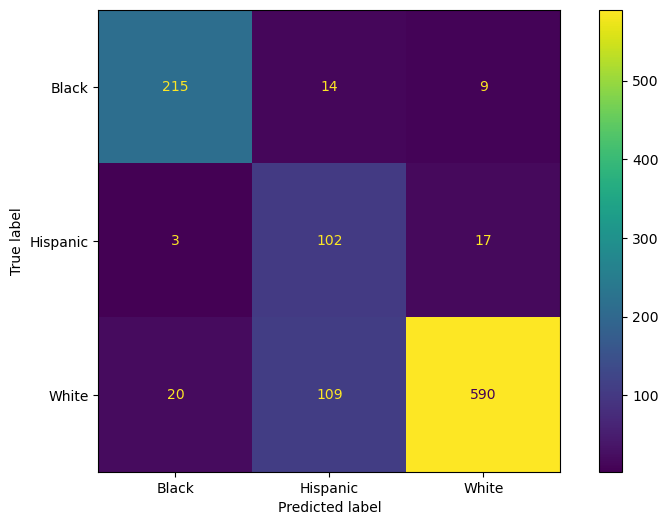

In [622]:
ConfusionMatrixDisplay.from_estimator(grid_model_log, X_test, y_test);

In [623]:
eval_metric(grid_model_log, X_train, y_train, X_test, y_test)

Test_Set
[[215  14   9]
 [  3 102  17]
 [ 20 109 590]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       238
    Hispanic       0.45      0.84      0.59       122
       White       0.96      0.82      0.88       719

    accuracy                           0.84      1079
   macro avg       0.77      0.85      0.79      1079
weighted avg       0.89      0.84      0.85      1079


Train_Set
[[ 889   35   25]
 [  19  409   61]
 [  55  336 2483]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93       949
    Hispanic       0.52      0.84      0.64       489
       White       0.97      0.86      0.91      2874

    accuracy                           0.88      4312
   macro avg       0.80      0.88      0.83      4312
weighted avg       0.91      0.88      0.89      4312



In [624]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression(class_weight = 'balanced', C=1, penalty = 'l2',
                                              random_state = 42))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:] 

test_f1_Hispanic           0.603
train_f1_Hispanic          0.643
test_precision_Hispanic    0.491
train_precision_Hispanic   0.523
test_recall_Hispanic       0.785
train_recall_Hispanic      0.836
dtype: float64

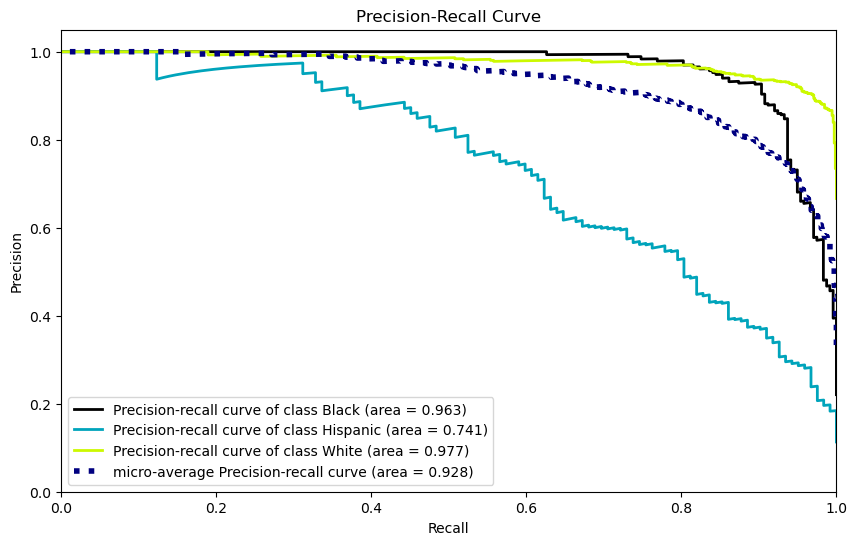

In [625]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("logistic", LogisticRegression(class_weight = 'balanced', C=1, penalty = 'l2',
                                              random_state = 42))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [626]:
pd.get_dummies(y_test, dtype=float).values

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [627]:
y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.7412639836626386

In [628]:
y_pred = grid_model_log.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model

In [629]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("svc", SVC(class_weight = 'balanced',
                                              random_state = 42))]
svc_model = Pipeline(steps=operations) #.set_output(transform="pandas")

svc_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['writingpreference',
                                                   'subjectsbirthlocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male']]),
                                                  ['gender'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('svc', SVC(class_weight='balanced', random_state=42))])

In [630]:
eval_metric(svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[216  11  11]
 [  4 101  17]
 [ 20 120 579]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.90       238
    Hispanic       0.44      0.83      0.57       122
       White       0.95      0.81      0.87       719

    accuracy                           0.83      1079
   macro avg       0.76      0.85      0.78      1079
weighted avg       0.88      0.83      0.85      1079


Train_Set
[[ 883   32   34]
 [  19  412   58]
 [  53  378 2443]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93       949
    Hispanic       0.50      0.84      0.63       489
       White       0.96      0.85      0.90      2874

    accuracy                           0.87      4312
   macro avg       0.80      0.87      0.82      4312
weighted avg       0.90      0.87      0.88      4312



## Cross Validation

In [631]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("svc", SVC(class_weight = 'balanced',
                                              random_state = 42))]
model = Pipeline(steps=operations) #.set_output(transform="pandas")

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.574
train_f1_Hispanic          0.628
test_precision_Hispanic    0.459
train_precision_Hispanic   0.502
test_recall_Hispanic       0.771
train_recall_Hispanic      0.842
dtype: float64

###  SVC Model GridsearchCV

In [632]:
precision_hispanic =  make_scorer(precision_score, pos_label="Hispanic", average=None, labels=["Hispanic"])

In [633]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("svc", SVC(class_weight = 'balanced',
                                              random_state = 42))]

model = Pipeline(steps=operations)

In [634]:
model.get_params()

{'memory': None,
 'steps': [('OneHot_Ordinal_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['writingpreference',
                                     'subjectsbirthlocation']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Female',
                                                                'Male']]),
                                    ['gender'])],
                     verbose_feature_names_out=False)),
  ('scaler', MinMaxScaler()),
  ('svc', SVC(class_weight='balanced', random_state=42))],
 'verbose': False,
 'OneHot_Ordinal_Encoder': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHo

In [635]:
param_grid = {'svc__C': [0.1, 1, 2],
              'svc__gamma': ["scale", "auto", 0.2, 0.3],
              'svc__kernel': ['rbf', 'linear']}

In [636]:
grid_model_svc = GridSearchCV(model, param_grid = param_grid, scoring=precision_hispanic, cv=10, return_train_score=True)

In [637]:
grid_model_svc.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['writingpreference',
                                                                          'subjectsbirthlocation']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Female',
                                                                                                     'Male']]),
                                                                         ['gender'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             param_grid={'svc__C': [0.1, 1, 2],
                         'svc__gamma': ['scale', 'auto', 0.2, 0.3],
                         'svc__kernel': ['rbf', 'linear']},
             return_train_score=True,
             scoring=make_scorer(precision_score, pos_label=Hispanic, average=None, labels=['Hispanic']))

In [638]:
grid_model_svc.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['writingpreference',
                                                   'subjectsbirthlocation']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male']]),
                                                  ['gender'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('svc',
                 SVC(C=2, class_weight='balanced', gamma=0.3,
                     random_state=42))])

In [639]:
pd.DataFrame(grid_model_svc.cv_results_).loc[grid_model_svc.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.542
mean_train_score   0.740
Name: 22, dtype: object

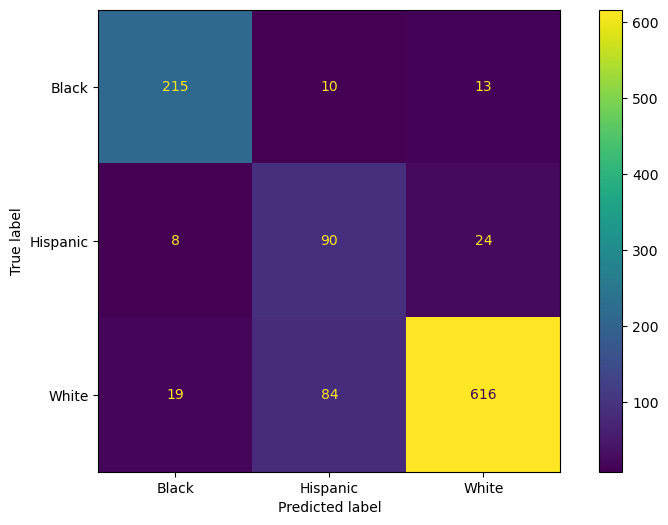

In [640]:
ConfusionMatrixDisplay.from_estimator(grid_model_svc, X_test, y_test);

In [641]:
eval_metric(grid_model_svc, X_train, y_train, X_test, y_test)

Test_Set
[[215  10  13]
 [  8  90  24]
 [ 19  84 616]]
              precision    recall  f1-score   support

       Black       0.89      0.90      0.90       238
    Hispanic       0.49      0.74      0.59       122
       White       0.94      0.86      0.90       719

    accuracy                           0.85      1079
   macro avg       0.77      0.83      0.79      1079
weighted avg       0.88      0.85      0.86      1079


Train_Set
[[ 933    9    7]
 [   1  476   12]
 [  18  164 2692]]
              precision    recall  f1-score   support

       Black       0.98      0.98      0.98       949
    Hispanic       0.73      0.97      0.84       489
       White       0.99      0.94      0.96      2874

    accuracy                           0.95      4312
   macro avg       0.90      0.96      0.93      4312
weighted avg       0.96      0.95      0.95      4312



In [642]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("svc", SVC(class_weight = 'balanced', C=2, gamma=0.3,
                                              random_state = 42))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.606
train_f1_Hispanic          0.841
test_precision_Hispanic    0.542
train_precision_Hispanic   0.740
test_recall_Hispanic       0.693
train_recall_Hispanic      0.975
dtype: float64

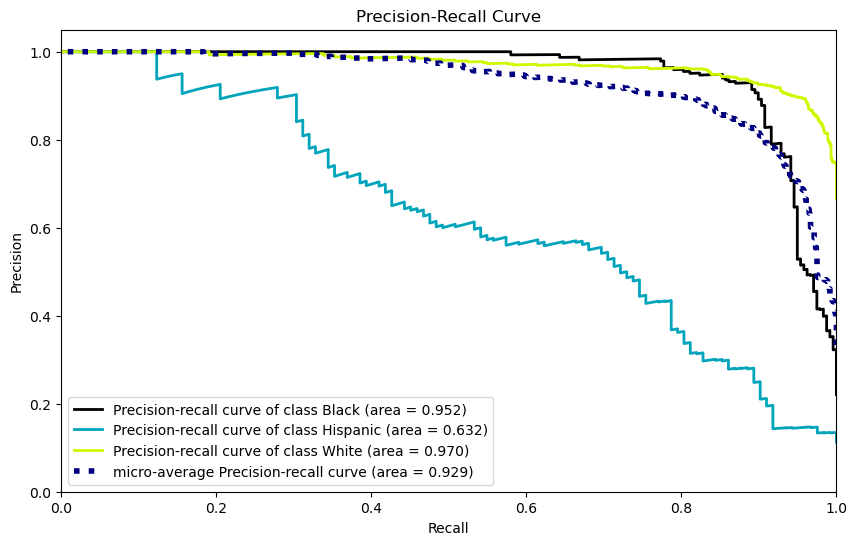

In [643]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("svc", SVC(class_weight = 'balanced', C=2, gamma=0.3,
                                              random_state = 42))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

# y_pred_proba = model.predict_proba(X_test) 
# we should use decision_function instead of predict_proba

plot_precision_recall(y_test, decision_function)
plt.show();

In [644]:
decision_function

# SVC makes prediction through the decision_function function.
# positive values indicate class 1, negative values indicate class 0.
# the larger the value, the further away the observation is from the hyper plane.

array([[-0.21195657,  0.78796348,  2.25916613],
       [-0.24796953,  0.87223672,  2.25969069],
       [-0.25966865,  1.19158359,  2.22829507],
       ...,
       [ 2.2214892 , -0.2406813 ,  1.12723514],
       [-0.23443672,  0.82711567,  2.25839373],
       [ 0.86541285, -0.19088099,  2.22285361]])

In [645]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

# We prefer the decision function as the average_precision score.

0.7412639836626386

In [646]:
y_pred = grid_model_svc.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
svc_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [647]:
cat = X_train.select_dtypes("object").columns
cat

Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object')

In [648]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1) 

column_trans = make_column_transformer((ord_enc, cat),  
                                       remainder='passthrough')

In [649]:
# There is no need for scaling in the Random Forest algorithm because tree-based algorithms work with the if-else method

In [650]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=42))]

rf_model = Pipeline(steps=operations_rf)

rf_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [651]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[160   0  78]
 [  6   5 111]
 [ 10   0 709]]
              precision    recall  f1-score   support

       Black       0.91      0.67      0.77       238
    Hispanic       1.00      0.04      0.08       122
       White       0.79      0.99      0.88       719

    accuracy                           0.81      1079
   macro avg       0.90      0.57      0.58      1079
weighted avg       0.84      0.81      0.76      1079


Train_Set
[[ 949    0    0]
 [   0  489    0]
 [   0    0 2874]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       949
    Hispanic       1.00      1.00      1.00       489
       White       1.00      1.00      1.00      2874

    accuracy                           1.00      4312
   macro avg       1.00      1.00      1.00      4312
weighted avg       1.00      1.00      1.00      4312



## Cross Validation

In [652]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=42))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model,
                        X_train, 
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.065
train_f1_Hispanic          1.000
test_precision_Hispanic    0.650
train_precision_Hispanic   1.000
test_recall_Hispanic       0.035
train_recall_Hispanic      1.000
dtype: float64

In [653]:
# There seems to be a significant overfitting in the model. 
# Overfitting is when the model performs very well on the training data but does not perform well enough on the test data.
# In the training set, we see that the model achieves 100% accuracy, precision, recall and f1-score in all classes. 
# This shows that the model has memorised the training data.
# In the test set, we see that the model performs almost poorly, 
# especially in the "Hispanic" class (recall: 0.04, f1-score: 0.08). 
# For the other classes, there is also a decline compared to the excellent performance in the training set, 
# but the decline in the Hispanic class is very pronounced.
# Cross validation results tell a similar story for the Hispanic class. 
# While the f1-score, precision and recall values for the Hispanic class are 1.000 in the training set, 
# these values are quite low in the test set.

### RF Model GridsearchCV

In [654]:
precision_hispanic =  make_scorer(precision_score, pos_label="Hispanic", average=None, labels=["Hispanic"])

In [655]:
operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     random_state=42))]
model = Pipeline(steps=operations)

In [656]:
model.get_params()

{'memory': None,
 'steps': [('OrdinalEncoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
  ('RF_model',
   RandomForestClassifier(class_weight='balanced', random_state=42))],
 'verbose': False,
 'OrdinalEncoder': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))]),
 'RF_model': RandomForestClassifier(class_weight='balanced', random_state=42),
 'Ordi

In [657]:
param_grid = {'RF_model__n_estimators':[50, 100, 200, 300], 
             'RF_model__max_depth':[2, 3, None],
             'RF_model__min_samples_split':[15, 20],
             'RF_model__min_samples_leaf': [5, 10],
             'RF_model__max_samples':[0.1, 0.2, 0.3]}

In [658]:
grid_model_rf = GridSearchCV(model,
                             param_grid,
                             scoring=precision_hispanic,
                             n_jobs=-1,
                             cv=10,
                             return_train_score=True)

grid_model_rf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, None],
                         'RF_model__max_samples': [0.1, 0.2, 0.3],
                         'RF_model__min_samples_leaf': [5, 10],
                         'RF_model__min_samples_split': [15, 20],
                         'RF_model__n_estimators': [50, 100, 200, 300]},
             return_train_score=True,
             scoring=make_scorer(precision_score, pos_label=Hispanic, average=None, labels=['Hispanic']))

In [659]:
grid_model_rf.best_params_

{'RF_model__max_depth': None,
 'RF_model__max_samples': 0.2,
 'RF_model__min_samples_leaf': 5,
 'RF_model__min_samples_split': 15,
 'RF_model__n_estimators': 200}

In [660]:
grid_model_rf.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        max_samples=0.2, min_samples_leaf=5,
                                        min_samples_split=15, n_estimators=200,
                                        random_state=42))])

In [661]:
grid_model_rf.best_score_

0.5135964912280702

In [662]:
pd.DataFrame(grid_model_rf.cv_results_).loc[grid_model_rf.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.514
mean_train_score   0.784
Name: 114, dtype: object

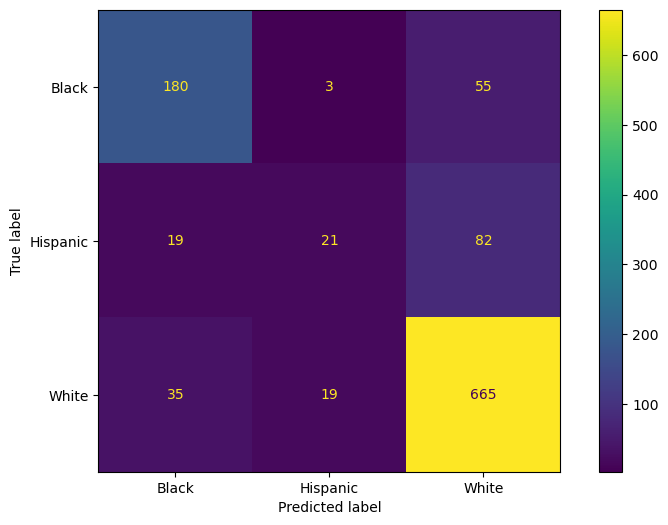

In [663]:
ConfusionMatrixDisplay.from_estimator(grid_model_rf, X_test, y_test);

In [664]:
eval_metric(grid_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[180   3  55]
 [ 19  21  82]
 [ 35  19 665]]
              precision    recall  f1-score   support

       Black       0.77      0.76      0.76       238
    Hispanic       0.49      0.17      0.25       122
       White       0.83      0.92      0.87       719

    accuracy                           0.80      1079
   macro avg       0.70      0.62      0.63      1079
weighted avg       0.78      0.80      0.78      1079


Train_Set
[[ 828    6  115]
 [  56  181  252]
 [  88   38 2748]]
              precision    recall  f1-score   support

       Black       0.85      0.87      0.86       949
    Hispanic       0.80      0.37      0.51       489
       White       0.88      0.96      0.92      2874

    accuracy                           0.87      4312
   macro avg       0.85      0.73      0.76      4312
weighted avg       0.87      0.87      0.86      4312



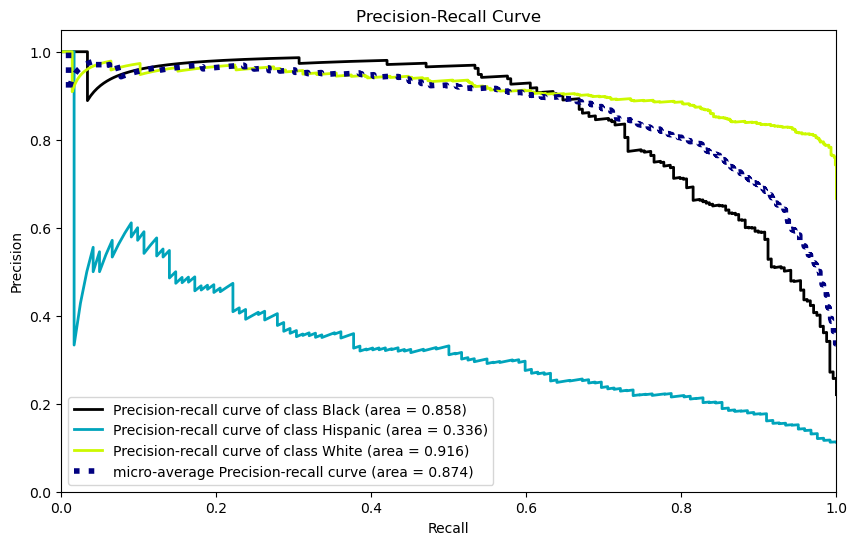

In [665]:
operations_rf = [("OrdinalEncoder", column_trans), 
                 ("RF_model", RandomForestClassifier(class_weight="balanced",
                                                     max_samples = 0.2,
                                                     min_samples_leaf= 5,
                                                     min_samples_split= 15,
                                                     n_estimators=200, 
                                                     random_state=42))]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [666]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.33564321534878905

In [667]:
y_pred = grid_model_rf.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_precision = precision_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [668]:
# XGBoost expects the dependent variable to contain numeric values, so the dependent variables must be converted to numeric values
# otherwise we got the error: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Black' 'Hispanic' 'White']

In [669]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                 ("XGB_model", XGBClassifier(random_state=42))]

xgb_model = Pipeline(steps=operations_xgb)

y_train_xgb = y_train.map({"Black":0, "Hispanic":1, "White":2})
y_test_xgb = y_test.map({"Black":0, "Hispanic":1, "White":2})

xgb_model.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [670]:
eval_metric(xgb_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[203   3  32]
 [  8  48  66]
 [ 15   8 696]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       238
           1       0.81      0.39      0.53       122
           2       0.88      0.97      0.92       719

    accuracy                           0.88      1079
   macro avg       0.86      0.74      0.78      1079
weighted avg       0.87      0.88      0.87      1079


Train_Set
[[ 949    0    0]
 [   0  489    0]
 [   0    0 2874]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       949
           1       1.00      1.00      1.00       489
           2       1.00      1.00      1.00      2874

    accuracy                           1.00      4312
   macro avg       1.00      1.00      1.00      4312
weighted avg       1.00      1.00      1.00      4312



### Cross Validation

In [671]:
# We changed the label values from "Hispanic" to 1 because in this model the y values consist of 0,1 and 2

In [672]:
f1_Hispanic = make_scorer(f1_score, pos_label=1, average = None, labels =[1])
precision_Hispanic = make_scorer(precision_score, pos_label=1, average = None, labels =[1])
recall_Hispanic = make_scorer(recall_score, pos_label=1, average = None, labels =[1])

scoring = {"f1_Hispanic":f1_Hispanic,
           "precision_Hispanic":precision_Hispanic,
           "recall_Hispanic":recall_Hispanic}

In [673]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                 ("XGB_model", XGBClassifier(random_state=42))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, 
                        X_train, 
                        y_train_xgb, 
                        scoring=scoring,
                        cv=10, 
                        return_train_score=True,
                       )
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.497
train_f1_Hispanic          1.000
test_precision_Hispanic    0.819
train_precision_Hispanic   1.000
test_recall_Hispanic       0.360
train_recall_Hispanic      1.000
dtype: float64

In [674]:
# As with the RF model, there appears to be significant overfitting in the XG Boost model. 
# Overfitting is when the model performs very well on training data but not well enough on test data.
# On the training set, we see that the model achieves 100% accuracy, precision, recall and f1-score in all classes. 
# This indicates that the model has memorised the training data.
# On the test set, we see that the model performs almost badly, 
# especially in the "Hispanic" class (recall: 0.39, f1-score: 0.53). 
# For the other classes there is also a decline compared to the excellent performance in the training set, 
# but the decline in the Hispanic class is very pronounced.
# The cross-validation results tell a similar story for the Hispanic class. 
# While the f1-score, precision and recall values for the Hispanic class in the training set were 1,000, 
# in the test set these values are quite low.

### XGBoost Model GridsearchCV

In [675]:
precision_hispanic =  make_scorer(precision_score, pos_label=1, average=None, labels=[1])

In [676]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                 ("XGB_model", XGBClassifier(random_state=42))]

model = Pipeline(steps=operations_xgb)

In [677]:
model.get_params()

{'memory': None,
 'steps': [('OrdinalEncoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
  ('XGB_model',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, 

In [678]:
# n_estimators: The number of trees is often associated with overfitting. 
# More trees can create a more complex model, which can lead to overfitting. Therefore, the value of n_estimators should be reduced.

# max_depth: Maximum depth of a tree. Deeper trees can model more detail but risk overfitting. 

# learning_rate: The learning rate controls the size of each tree's contribution. 
# A lower learning rate allows learning in smaller steps and can reduce the risk of overfitting. 

# subsample: The proportion of the sample to be used for each tree. A smaller subsample can help generalise the model. 

# colsample_bytree: The proportion of features to use for each tree. A lower colsample_bytree can help generalise the model. 

In [679]:
param_grid = {'XGB_model__n_estimators':[50, 70, 100],
              'XGB_model__max_depth':[1,2], 
              'XGB_model__learning_rate': [0.01, 0.05, 0.1],
              'XGB_model__subsample':[0.5, 0.7, 1],
              'XGB_model__colsample_bytree':[0.5,0.7, 1]}

In [680]:
grid_model_xgb = GridSearchCV(model,
                             param_grid,
                             scoring=precision_hispanic,
                             n_jobs=-1,
                             cv=10,
                             return_train_score=True)

grid_model_xgb.fit(X_train,y_train_xgb)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callback...
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.5, 0.7, 1],
                         'XGB_model__learning_rate': [0.01, 0.05, 0.1],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [50, 70, 100],
                         'XGB_model__subsample': [0.5, 0.7, 1]},
             return_train_score=True,
             scoring=make_scorer(precision_score, pos_label=1, average=None, labels=[1]))

In [681]:
grid_model_xgb.best_params_

{'XGB_model__colsample_bytree': 0.7,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 0.5}

In [682]:
grid_model_xgb.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [683]:
grid_model_xgb.best_score_

0.9349999999999999

In [684]:
pd.DataFrame(grid_model_xgb.cv_results_).loc[grid_model_xgb.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.935
mean_train_score   0.922
Name: 87, dtype: object

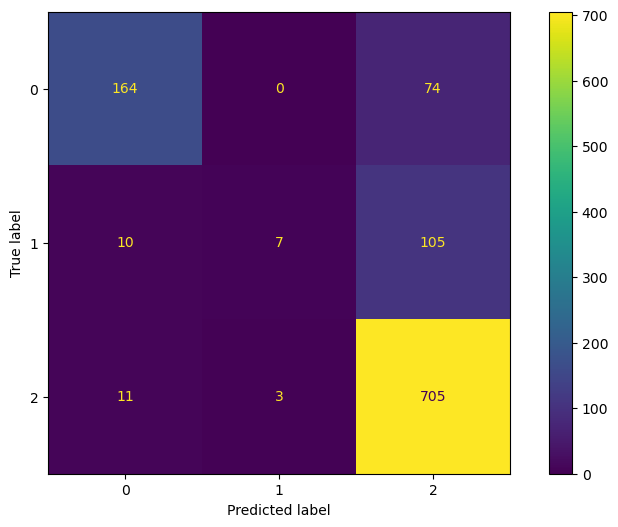

In [685]:
ConfusionMatrixDisplay.from_estimator(grid_model_xgb, X_test, y_test_xgb);

In [686]:
eval_metric(grid_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[164   0  74]
 [ 10   7 105]
 [ 11   3 705]]
              precision    recall  f1-score   support

           0       0.89      0.69      0.78       238
           1       0.70      0.06      0.11       122
           2       0.80      0.98      0.88       719

    accuracy                           0.81      1079
   macro avg       0.79      0.58      0.59      1079
weighted avg       0.81      0.81      0.77      1079


Train_Set
[[ 670    1  278]
 [  43   48  398]
 [  38    1 2835]]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       949
           1       0.96      0.10      0.18       489
           2       0.81      0.99      0.89      2874

    accuracy                           0.82      4312
   macro avg       0.89      0.60      0.62      4312
weighted avg       0.84      0.82      0.79      4312



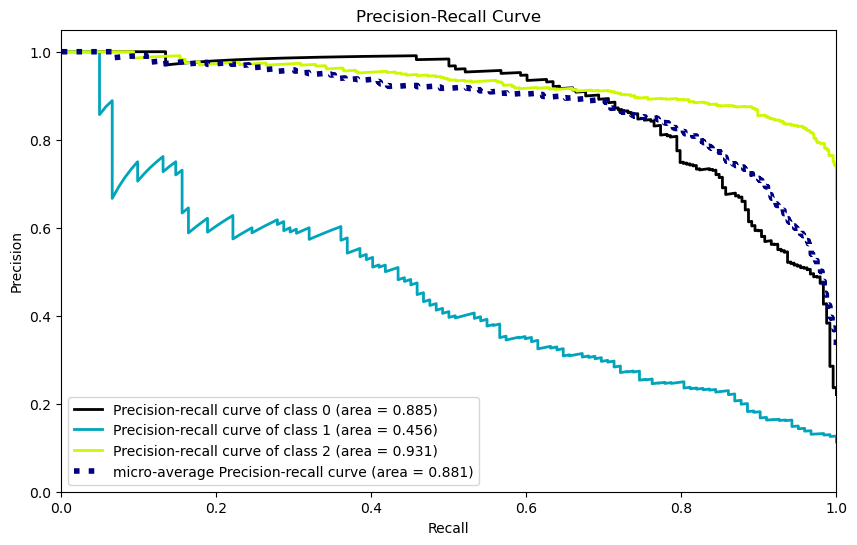

In [687]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                 ("XGB_model", XGBClassifier(subsample = 0.5,
                                             max_depth = 2,
                                             n_estimators = 100,
                                             colsample_bytree = 0.7,
                                             learning_rate = 0.05,
                                             random_state=42))]
model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xgb)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show();

In [688]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [689]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.45584840580357905

In [690]:
y_pred = grid_model_xgb.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_precision = precision_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

## Comparing Models

In [691]:
compare= pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                       "Precision": [log_precision[0], svc_precision[0], rf_precision[0], xgb_precision[0]],
                       "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                       "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

compare

,Model,Precision,Recall,AP
0,Logistic Regression,0.453,0.836,0.741
1,SVM,0.489,0.738,0.741
2,Random Forest,0.488,0.172,0.336
3,XGBoost,0.700,0.057,0.456


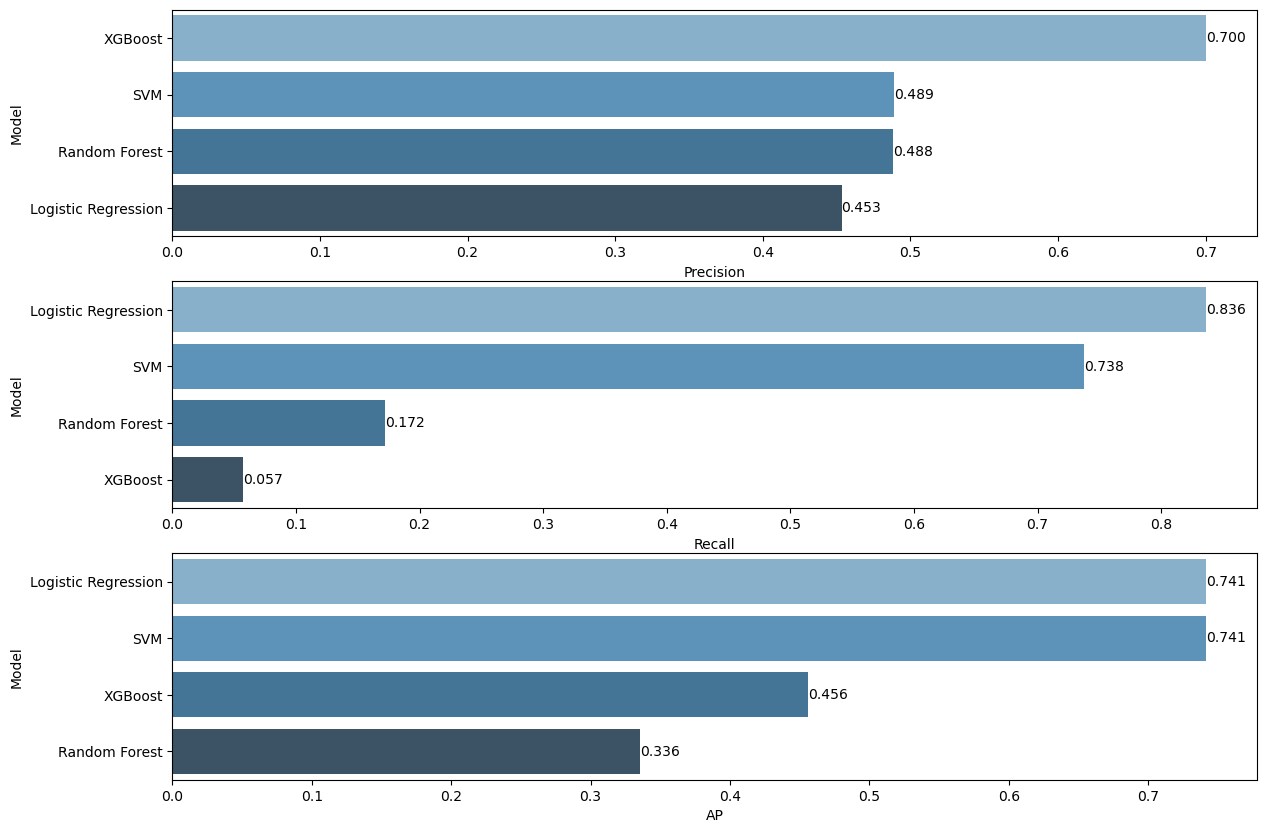

In [692]:
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

In [693]:
# The model with the best results for Precision score is XGBoost 

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [708]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score
# matthews_corrcoef?
# cohen_kappa_score?

In [709]:
y_pred_log = grid_model_log.predict(X_test)
y_pred_svc = grid_model_svc.predict(X_test)
y_pred_rf = grid_model_rf.predict(X_test)
y_pred_xgb = grid_model_xgb.predict(X_test)

In [710]:
matthews_log = matthews_corrcoef(y_test, y_pred_log)
matthews_svc = matthews_corrcoef(y_test, y_pred_svc)
matthews_rf = matthews_corrcoef(y_test, y_pred_rf)
matthews_xgb = matthews_corrcoef(y_test_xgb, y_pred_xgb)

In [711]:
cohen_kappa_log = cohen_kappa_score(y_test, y_pred_log)
cohen_kappa_svc = cohen_kappa_score(y_test, y_pred_svc)
cohen_kappa_rf = cohen_kappa_score(y_test, y_pred_rf)
cohen_kappa_xgb = cohen_kappa_score(y_test_xgb, y_pred_xgb)

In [712]:
compare_matthews = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                                 "Matthews_corrcoef": [matthews_log, matthews_svc, matthews_rf, matthews_xgb],
                                 "Cohen_kappa_score": [cohen_kappa_log, cohen_kappa_svc, cohen_kappa_rf, cohen_kappa_xgb]})
compare_matthews

,Model,Matthews_corrcoef,Cohen_kappa_score
0,Logistic Regression,0.723,0.709
1,SVM,0.729,0.723
2,Random Forest,0.574,0.564
3,XGBoost,0.590,0.547


## Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [698]:
cat

Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object')

In [699]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1) 

column_trans_final = make_column_transformer((ord_enc, cat),  
                                              remainder='passthrough')

operations_final = [("OrdinalEncoder", column_trans_final), 
                    ("XGB_model", XGBClassifier(subsample = 0.5,
                                                max_depth = 2,
                                                n_estimators = 100,
                                                colsample_bytree = 0.7,
                                                learning_rate = 0.05,
                                                random_state=42))]

y = y.map({"Black":0, "Hispanic":1, "White":2})

final_model = Pipeline(steps=operations_final)
final_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [700]:
random_index = np.random.choice(df.index)

In [701]:
random_row = df.loc[random_index]

In [702]:
random_row

abdominalextensiondepthsitting               284
acromialheight                              1381
acromionradialelength                        326
anklecircumference                           244
axillaheight                                1270
balloffootcircumference                      247
balloffootlength                             188
biacromialbreadth                            364
bicepscircumferenceflexed                    380
bicristalbreadth                             333
bideltoidbreadth                             522
bimalleolarbreadth                            67
bitragionchinarc                             322
bitragionsubmandibulararc                    311
bizygomaticbreadth                           145
buttockcircumference                        1217
buttockdepth                                 285
buttockheight                                872
buttockkneelength                            644
buttockpopliteallength                       522
calfcircumference   

In [703]:
random_row['acromialheight'] = 1400
random_row['chestcircumference'] = 880
random_row['stature'] = 1700
random_row['age'] = 25
random_row['weightkg'] = 600
random_row['bideltoidbreadth'] = 400
random_row['buttockdepth'] = 220
random_row['crotchlengthomphalion'] = 645
random_row['earlength'] = 50
random_row['forearmhandlength'] = 415
random_row['headbreadth'] = 150
random_row['interscyei'] = 360
random_row['neckcircumference'] = 320
random_row['palmlength'] = 130

In [704]:
sample0 = pd.DataFrame([random_row])
sample = sample0.drop(columns=["dodrace"])
sample

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,subjectsbirthlocation,age,writingpreference
517,284,1400,326,244,1270,247,188,364,380,333,400,67,322,311,145,1217,220,872,644,522,444,1418,338,880,323,1190,812,645,375,34,50,19,254,755,97,254,325,305,593,415,1110,78,189,185,150,584,186,337,78,416,475,1002,655,360,430,463,537,483,63,503,109,320,411,1377,130,386,244,1120,347,120,858,850,565,1702,1700,1375,1075,780,212,787,458,123,879,1745,449,348,1037,265,393,990,600,166,822,Female,North Carolina,25,Right hand


In [705]:
final_model.predict(sample)  

array([0], dtype=int64)

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [713]:
# !pip install imblearn

In [707]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

#  SHAP
- http://archive.today/2024.02.04-155206/https://towardsdatascience.com/shapley-values-clearly-explained-a7f7ef22b104
- https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___